In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)


---

In [2]:
df = pd.read_csv("data/processed/telco_clean.csv")
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


---

## Preparare X e y e dividere train/test

In [3]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42, stratify=y
)

---

## Standardizzazione

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Questo rende tutte le colonne confrontabili tra loro.

---

## Addestrare di nuovo il modello

In [6]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

---

## Previsioni

In [7]:
y_pred = model.predict(X_test_scaled)
y_pred[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

---

## Confusion Matrix

In [9]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[916, 117],
       [159, 215]])

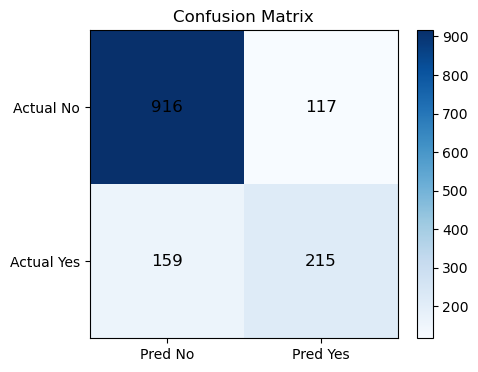

In [10]:
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.colorbar()

plt.xticks([0,1], ['Pred No', 'Pred Yes'])
plt.yticks([0,1], ['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=12)

plt.show()


---

## Classification Report

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



---

## ROC Curve

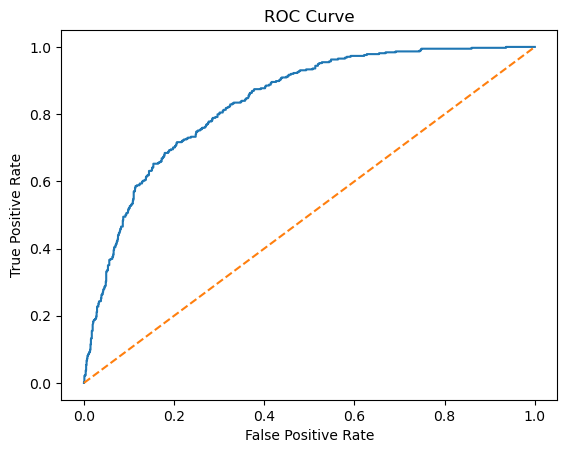

In [13]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')  # linea casuale
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


---

## AUC Score

In [14]:
auc = roc_auc_score(y_test, y_pred_proba)
auc


np.float64(0.8356727976766699)

Valori tipici:
- 0.5 = modello casuale
- 0.7-0.8 = buono
- 0.8-0.9 = ottimo
- 0.9-1.0 = eccellente

---

## Importanza delle variabili

In [15]:
coeffs = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_[0]
}).sort_values(by="coefficient", ascending=False)

coeffs.head(10)


,feature,coefficient
10,InternetService_Fiber optic,0.727745
3,TotalCharges,0.639028
21,StreamingTV_Yes,0.249702
23,StreamingMovies_Yes,0.236368
9,MultipleLines_Yes,0.214359
28,PaymentMethod_Electronic check,0.181473
26,PaperlessBilling_Yes,0.142663
0,SeniorCitizen,0.070792
17,DeviceProtection_Yes,0.068965
29,PaymentMethod_Mailed check,0.033392


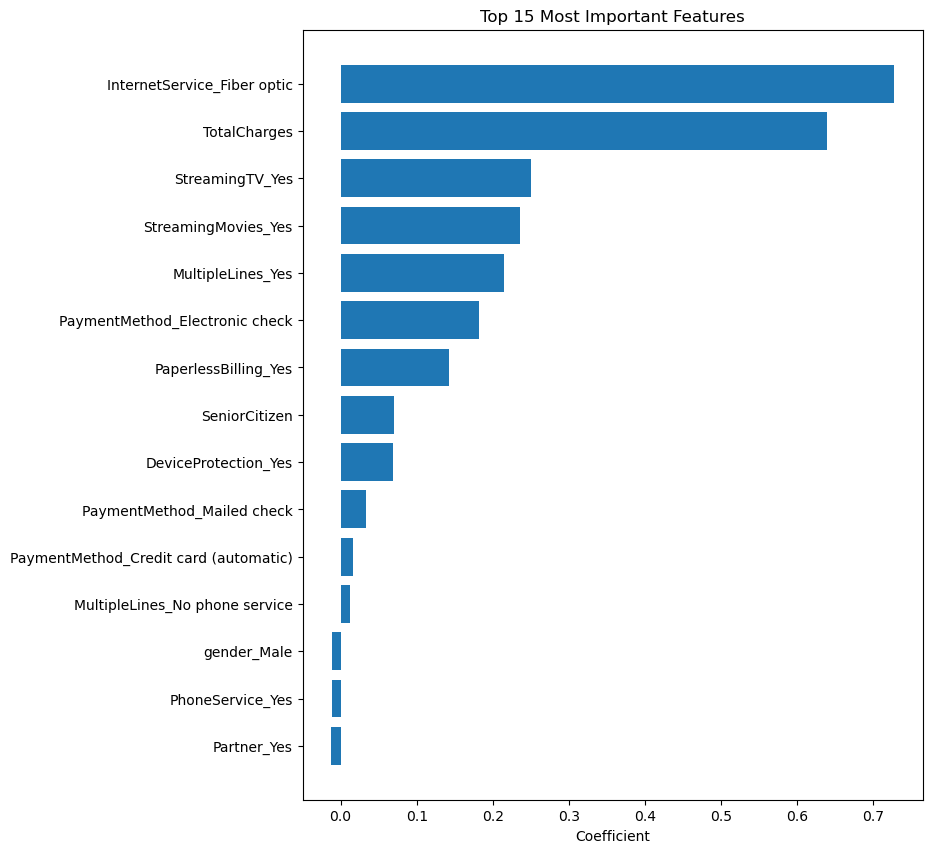

In [16]:
plt.figure(figsize=(8,10))
plt.barh(coeffs["feature"][:15], coeffs["coefficient"][:15])
plt.xlabel("Coefficient")
plt.title("Top 15 Most Important Features")
plt.gca().invert_yaxis()
plt.show()
